In [1]:
# Libraries Importation

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
#Dada source

In [6]:
url = "https://docs.google.com/spreadsheets/d/1I93xay8dfxiL25qYohMAFIbh204vHBJSC3iKm_Y-Apc/edit?usp=sharing"

In [7]:
o = pd.read_html(url, index_col=1, skiprows = 1)

In [8]:
xlsx_path = ('Carteira Acoes B3.xlsx')

In [9]:
e = pd.read_excel(xlsx_path)

In [10]:
#Fitting Data

In [11]:
stocks_now = o[0]
stocks_now = stocks_now.dropna().drop(columns=['1'])
stocks_dataframe = e.dropna()
stocks_dataframe.rename(columns={'Codigo da Açao':'Ticker', 'Valor Pago': 'Valor_Pago'}, inplace = True)

In [12]:
#Pick Sotock by Ticker

In [13]:
def ticker_location(ticker_desired):
    return raw_data.loc[(raw_data["Ticker"] == ticker_desired)]
    

In [14]:
#Finding the total price and add then to the dataframe

In [15]:
stocks_dataframe['Valor Total'] = stocks_dataframe['Quantidade'] * stocks_dataframe['Valor_Pago']

In [16]:
#Find Stock by Ticker

In [17]:
def find_all_stock(ticker_desired):
    return stocks_dataframe['Ticker']==ticker_desired

In [18]:
#Mean Value Stock Price

In [19]:
def mean_price_paid(ticker_desired):
    x=stocks_dataframe[find_all_stock(ticker_desired)].sum()
    return round(x[-1]/x[1],2)

In [20]:
#Sum of desired stock

In [21]:
def sum_stock_desired(ticker_desired):
    x=stocks_dataframe[find_all_stock(ticker_desired)].sum()
    return x[1]

In [22]:
#valuation or devaluation in total

In [23]:
def valuation(ticker_desired):
    return round((stocks_now.loc[ticker_desired, 'Preco']-mean_price_paid(ticker_desired))*sum_stock_desired(ticker_desired),2)

In [24]:
#Percent variation

In [25]:
def percent_variation(ticker_desired):
    return round(((stocks_now.loc[ticker_desired, 'Preco']-mean_price_paid(ticker_desired))/stocks_now.loc[ticker_desired, 'Preco'])*100,2)

In [26]:
#Geting a series of uniques stocks names

In [27]:
unique_stocks_ticker = stocks_dataframe['Ticker'].unique()

In [28]:
#Creating a data frame with the main analysis values

In [29]:
def main_analisys_values():
    stocks_stats = pd.DataFrame(unique_stocks_ticker, columns=['Ticker'])
    v=[]
    for i in unique_stocks_ticker:
        v.append(mean_price_paid(i))
    stocks_stats['Mean price paid'] = v
    v=[]
    for i in unique_stocks_ticker:
        v.append(sum_stock_desired(i))
    stocks_stats['Qty'] = v
    stocks_stats['Total Paid'] = stocks_stats['Mean price paid']*stocks_stats['Qty']
    v=[]
    for i in unique_stocks_ticker:
        v.append(stocks_now.loc[i, 'Preco'])
    stocks_stats['Un Value Now'] = v
    stocks_stats['Total Value Now'] = stocks_stats['Un Value Now']*stocks_stats['Qty']
    stocks_stats.drop(columns='Un Value Now', inplace=True)
    v=[]    
    for i in unique_stocks_ticker:
        v.append(valuation(i))
    stocks_stats['Valuation'] = v
    v=[]
    for i in unique_stocks_ticker:
        v.append(percent_variation(i))
    stocks_stats['Percent variation'] = v
    v=[]
    return stocks_stats

In [30]:
stocks_stats = main_analisys_values()

In [31]:
#Print the results

In [32]:
print(stocks_stats)

    Ticker  Mean price paid  Qty  Total Paid  Total Value Now  Valuation  \
0    ITSA4            11.63  305     3547.15          2989.00    -558.15   
1   TAEE11            28.93   36     1041.48          1020.24     -21.24   
2    MRVE3            21.70   10      217.00           188.10     -28.90   
3    TRPL4            21.64   41      887.24           902.82      15.58   
4   BRCR11           124.00    2      248.00           175.34     -72.66   
5   XPML11           134.12    6      804.72           657.00    -147.72   
6   HGRE11           204.20    1      204.20           145.30     -58.90   
7   SDIL11           138.27    1      138.27           101.92     -36.35   
8   VGIR11           113.00    1      113.00            80.20     -32.80   
9   IVVB11           173.54   10     1735.40          2002.50     267.10   
10  XPLG11           113.32   26     2946.32          3321.24     374.92   
11   ITUB4            27.62   50     1381.00          1212.00    -169.00   
12   WEGE3  

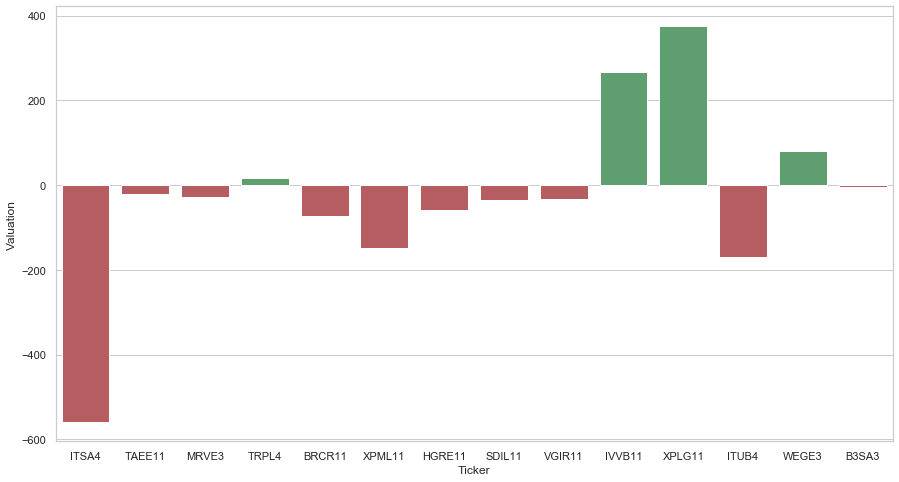

In [33]:
#Setting green to positive values and red to negative ones
custom_palette={}
for i in range(0, len(stocks_stats.Valuation)):
    if  stocks_stats.Valuation[i] >= 0:
        custom_palette[stocks_stats.Ticker[i]] = 'g'
    else:
        custom_palette[stocks_stats.Ticker[i]] = 'r'
        
#Ploting valuations data
sns.set(style='whitegrid')
plt.figure(figsize=(15,8)) 
sns.barplot(x='Ticker', y='Valuation', data=stocks_stats, palette=custom_palette)

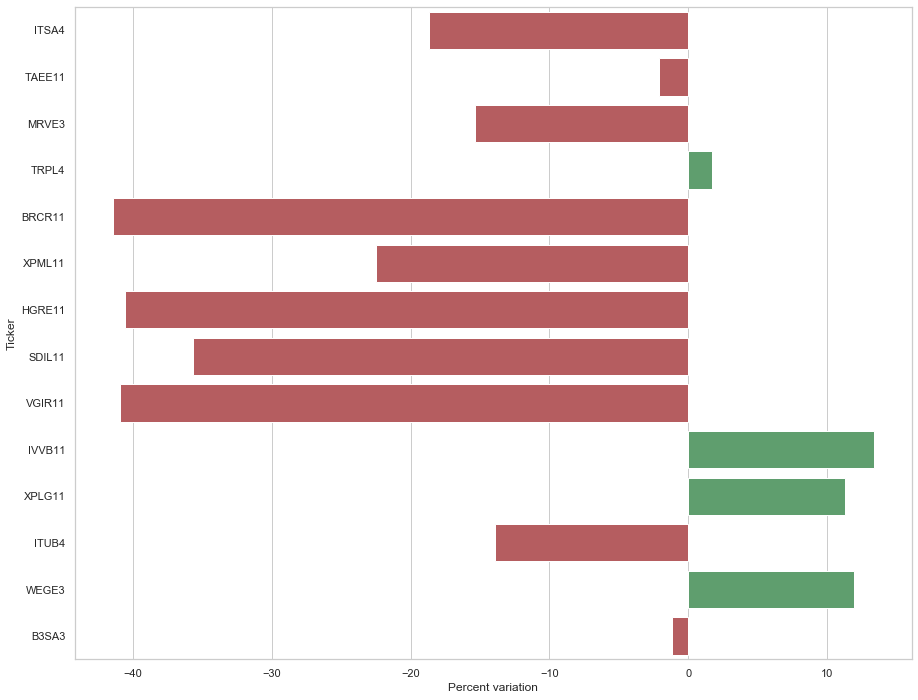

In [104]:
#Setting green to positive values and red to negative ones
custom_palette={}
for i in range(0, len(stocks_stats['Percent variation'])):
    if  stocks_stats['Percent variation'][i] >= 0:
        custom_palette[stocks_stats.Ticker[i]] = 'g'
    else:
        custom_palette[stocks_stats.Ticker[i]] = 'r'
        
#Ploting percent data
sns.set(style='whitegrid')
plt.figure(figsize=(15,12)) 
sns.barplot(y='Ticker', x='Percent variation', data=stocks_stats, palette=custom_palette)

In [35]:
#Finding the percent composition by ticker in the portifolio 

In [36]:
stocks_stats['Composition'] = round(stocks_stats['Total Value Now']/stocks_stats['Total Value Now'].sum()*100,2)

In [37]:
#Finding the portifolio performance overall 

In [38]:
portifolio_performance = {'Total_Invested':[stocks_stats['Total Paid'].sum()],'Total_Value_Now':[stocks_stats['Total Value Now'].sum()]}

In [39]:
portifolio_performance = pd.DataFrame(portifolio_performance)

In [40]:
portifolio_performance['Total_Earn_Or_Loss'] = portifolio_performance.Total_Value_Now - portifolio_performance.Total_Invested 

In [41]:
portifolio_performance['Total_Percent_Variation'] = round((portifolio_performance.Total_Value_Now/portifolio_performance.Total_Invested - 1)*100,2) 

In [42]:
print(portifolio_performance)

   Total_Invested  Total_Value_Now  Total_Earn_Or_Loss  \
0        14175.38         13784.56             -390.82   

   Total_Percent_Variation  
0                    -2.76  


In [43]:
pie_plt = stocks_stats[['Ticker','Composition']]
pie_plt.set_index('Ticker', inplace = True)
pie_plt=pie_plt.groupby('Ticker')[['Composition']].sum()

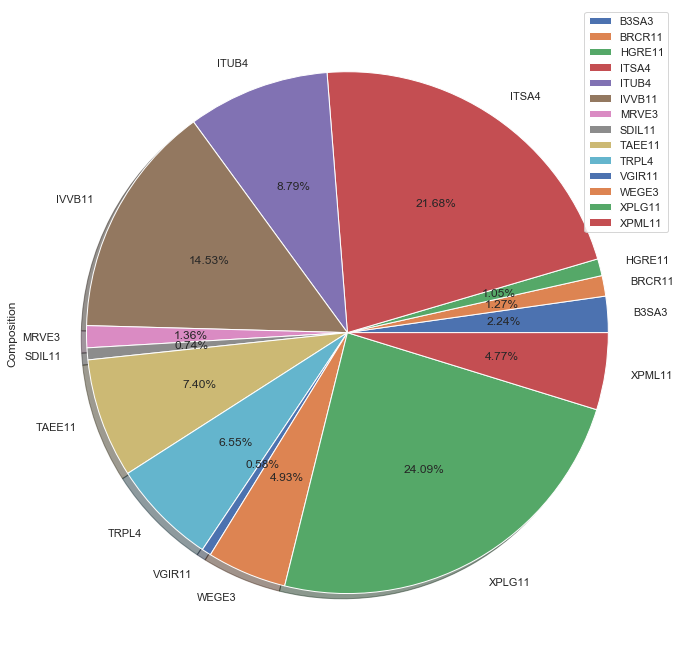

In [44]:
pie_plt.plot.pie(y='Composition',figsize=(12,12),shadow=True,autopct = '%1.2f%%')

In [45]:
#Segregate by Investment type

In [46]:
v=[]
for i in range(len(stocks_now.loc[stocks_stats['Ticker']][['Classe']])):
  v.append(stocks_now.loc[stocks_stats['Ticker']][['Classe']].iloc[i].Classe)
stocks_stats['Classe']=v

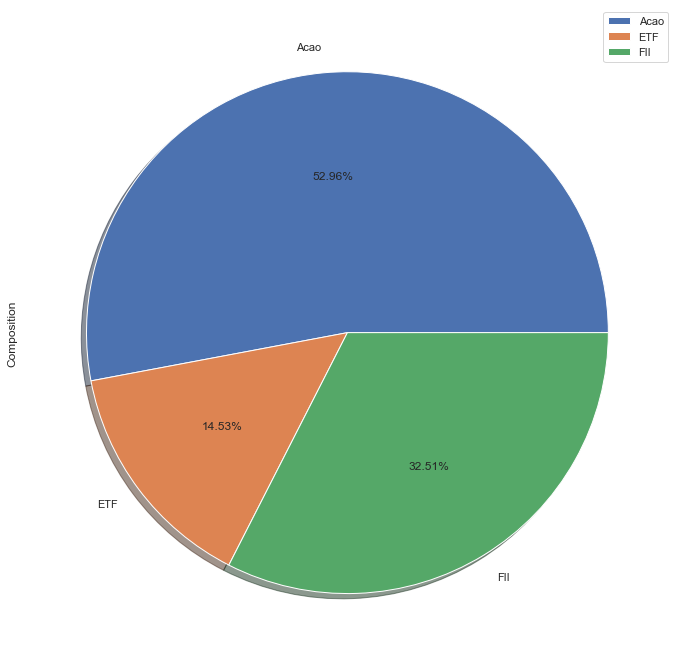

In [47]:
pie_plt = stocks_stats[['Classe','Composition']]
pie_plt.set_index('Classe', inplace = True)
pie_plt=pie_plt.groupby('Classe')[['Composition']].sum()
pie_plt.plot.pie(y='Composition',figsize=(12,12),shadow=True,autopct = '%1.2f%%')

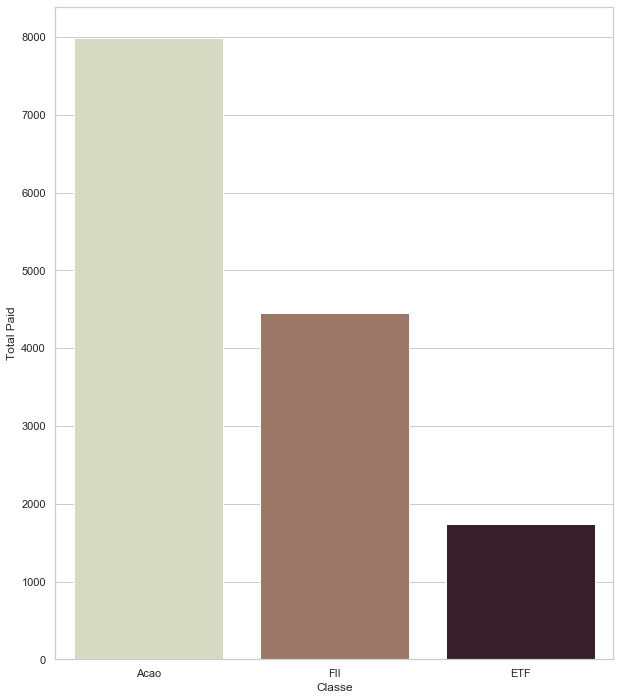

In [129]:
plt.figure(figsize=(10,12)) 
sns.barplot(y='Total Paid', x='Classe',data=stocks_stats, palette="ch:.5" ,estimator=sum, ci=None)